<a href="https://colab.research.google.com/github/Highflying07/Data-Science/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 1. 각각 CSV 파일 읽기
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv')

# 2. 위로 연결(concat)해서 하나로 합치기
df = pd.concat([data1, data2], axis=0, ignore_index=False)
# 3. 결과 확인
df
print(df.shape)  # (행 수, 열 수)


(1067371, 17)


In [ ]:
df.tail()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Unnamed: 8,Invoice.1,StockCode.1,Description.1,Quantity.1,InvoiceDate.1,Price.1,Customer ID,Country.1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50,4.95,12680.0,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
541909,581587,POST,POSTAGE,1,2011-12-09 12:50,18.00,12680.0,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(columns=['Unnamed: 8',	'Invoice.1',	'StockCode.1',	'Description.1',	'Quantity.1',	'InvoiceDate.1',	'Price.1','Customer ID'	,'Country.1'], inplace=True)

In [ ]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50,4.95,12680.0,France
541909,581587,POST,POSTAGE,1,2011-12-09 12:50,18.00,12680.0,France


In [ ]:
# 1. InvoiceDate를 날짜 형식(datetime)으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# # # 2. CustomerID 결측치 제거
df = df.dropna(subset=['CustomerID'])

# # # 3. CustomerID를 정수형으로 변환
df['CustomerID'] = df['CustomerID'].astype(int)

# # # 4. InvoiceDate 기준으로 데이터 정렬
df = df.sort_values('InvoiceDate')

# # # 5. Total 금액 컬럼 생성
df['Total'] = df['Quantity'] * df['Price']

df.tail()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,Total
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.6
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.6
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.0
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680,France,15.6
541909,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France,18.0


Country
United Kingdom          5410
Germany                  107
France                    95
Spain                     41
Belgium                   29
Portugal                  24
Netherlands               23
Switzerland               22
Sweden                    19
Italy                     17
Finland                   15
Australia                 15
Channel Islands           14
Norway                    13
Austria                   13
Denmark                   12
Cyprus                    11
Japan                     10
USA                        9
Unspecified                7
Poland                     6
Greece                     5
EIRE                       5
Canada                     5
Israel                     4
United Arab Emirates       4
Malta                      2
Bahrain                    2
Brazil                     2
RSA                        2
Korea                      2
Czech Republic             1
Iceland                    1
Lebanon                    1
Lithua

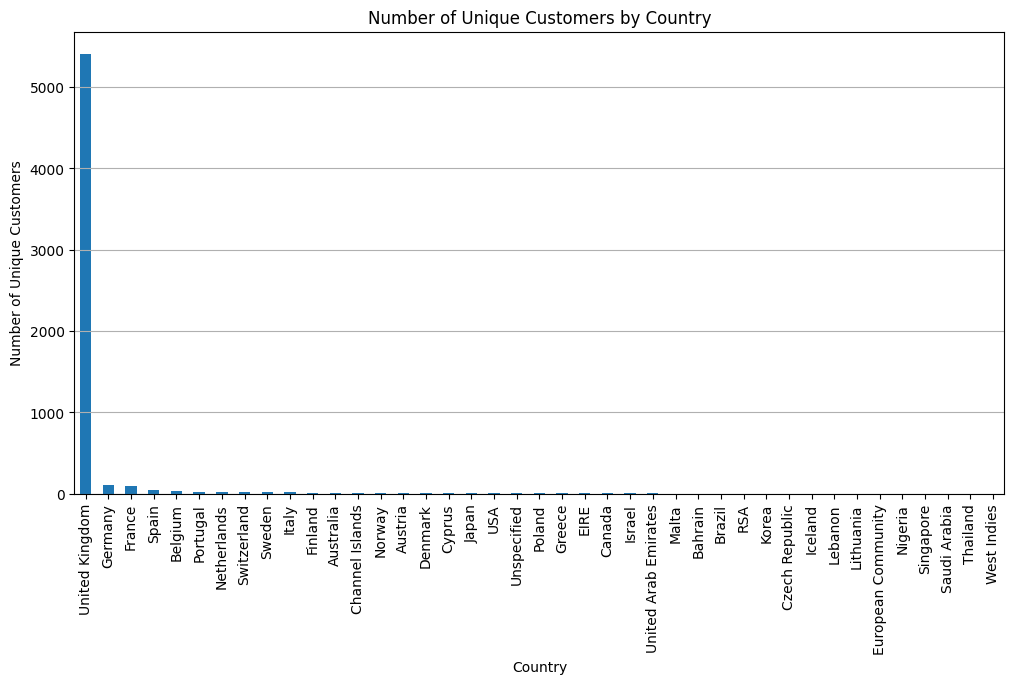

In [ ]:
import matplotlib.pyplot as plt

# 1. 나라별로 CustomerID의 고유(unique) 수 세기
country_customer_count = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

# 2. 결과 확인
print(country_customer_count)

# # 3. 시각화
plt.figure(figsize=(12,6))
country_customer_count.plot(kind='bar')
plt.title('Number of Unique Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)  # 나라 이름이 겹치지 않게 90도 회전
plt.grid(axis='y')
plt.show()

FirstPurchaseMonth
2009-12    1045
2010-01     394
2010-02     363
2010-03     436
2010-04     291
2010-05     254
2010-06     269
2010-07     183
2010-08     158
2010-09     242
2010-10     379
2010-11     322
2010-12      77
2011-01      71
2011-02     123
2011-03     178
2011-04     105
2011-05     108
2011-06     108
2011-07     102
2011-08     106
2011-09     187
2011-10     221
2011-11     192
2011-12      28
Freq: M, Name: CustomerID, dtype: int64


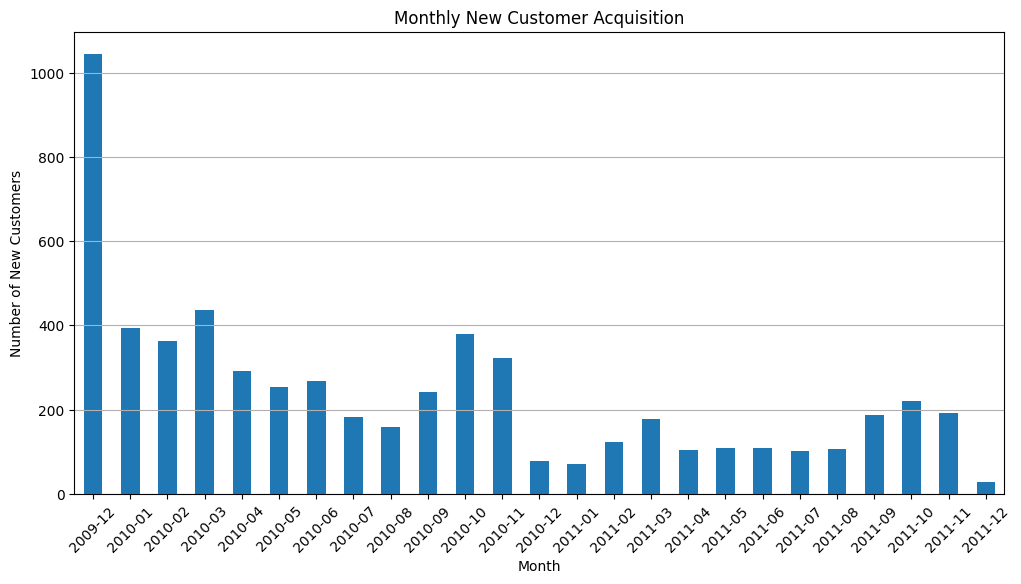

In [ ]:
import matplotlib.pyplot as plt

# 1. 고객별(CustomerID)로 첫 구매 날짜 구하기
first_purchase = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()

# 2. 첫 구매 날짜를 '연-월' 포맷으로 변환
first_purchase['FirstPurchaseMonth'] = first_purchase['InvoiceDate'].dt.to_period('M')

# 3. 월별 신규 고객 수 집계
monthly_new_customers = first_purchase.groupby('FirstPurchaseMonth')['CustomerID'].nunique()

# 4. 결과 확인
print(monthly_new_customers)

# 5. 시각화
plt.figure(figsize=(12,6))
monthly_new_customers.plot(kind='bar')
plt.title('Monthly New Customer Acquisition')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
# 1. 고객별 총 구매 금액 집계
customer_total_spent = df.groupby('CustomerID')['Total'].sum()

# 2. 활성화된 고객 (총 구매 금액이 50 이상인 고객)
activated_customers = customer_total_spent[customer_total_spent >= 50]

# 3. 총 고객 수
total_customers = customer_total_spent.shape[0]

# 4. 활성화된 고객 수
activated_customers_count = activated_customers.shape[0]

# 5. 고객 활성화율 계산
activation_rate = activated_customers_count / total_customers

# 6. 결과 출력
print(f"총 고객 수: {total_customers}명")
print(f"활성화된 고객 수 (구매금액 £50 이상): {activated_customers_count}명")
print(f"고객 활성화율: {activation_rate:.2%}")


총 고객 수: 5942명
활성화된 고객 수 (구매금액 £50 이상): 5777명
고객 활성화율: 97.22%


In [ ]:
import pandas as pd
import numpy as np

# 1. 가입 월(CohortMonth) 추가
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

# 2. 구매 월(PurchaseMonth) 추가
df['PurchaseMonth'] = df['InvoiceDate'].dt.to_period('M')

# 3. Cohort Index (몇 번째 월인가) 계산
def cohort_index(df):
    year_diff = df['PurchaseMonth'].dt.year - df['CohortMonth'].dt.year
    month_diff = df['PurchaseMonth'].dt.month - df['CohortMonth'].dt.month
    return year_diff * 12 + month_diff + 1

df['CohortIndex'] = cohort_index(df)

# 4. Cohort 테이블 생성 (CohortMonth vs CohortIndex로 고객 수 집계)
cohort_counts = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# 5. Pivot 테이블로 변환
cohort_pivot = cohort_counts.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# 6. 각 Cohort에서 1개월차 고객 수로 나눠서 Retention Rate 계산
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0) * 100  # 비율(%)로

# 결과 확인
print(retention.round(1))

CohortIndex     1     2     3     4     5     6     7     8     9     10  ...  \
CohortMonth                                                               ...   
2009-12      100.0  37.5  34.3  42.8  39.2  39.0  39.0  35.8  34.0  37.5  ...   
2010-01      100.0  21.8  30.2  30.5  27.9  29.2  26.6  23.1  28.9  34.0  ...   
2010-02      100.0  30.0  22.6  30.3  25.6  20.9  21.8  28.4  27.5  29.2  ...   
2010-03      100.0  21.8  25.9  23.6  22.9  20.0  24.1  29.8  28.9  11.5  ...   
2010-04      100.0  23.0  19.9  16.2  18.6  23.0  27.1  26.1  11.3  11.7  ...   
2010-05      100.0  19.3  17.7  19.3  18.9  26.0  22.0  13.0   6.7   8.7  ...   
2010-06      100.0  21.6  19.7  20.4  23.0  28.3  13.0   9.3   8.2  11.9  ...   
2010-07      100.0  20.8  20.2  28.4  30.1  15.3  11.5  15.3  14.2  12.0  ...   
2010-08      100.0  24.7  31.6  32.3  18.4  13.3  10.1  13.9  14.6  13.3  ...   
2010-09      100.0  30.2  26.0  14.0   9.1  10.3  14.0   9.9  12.4  14.0  ...   
2010-10      100.0  29.6  16

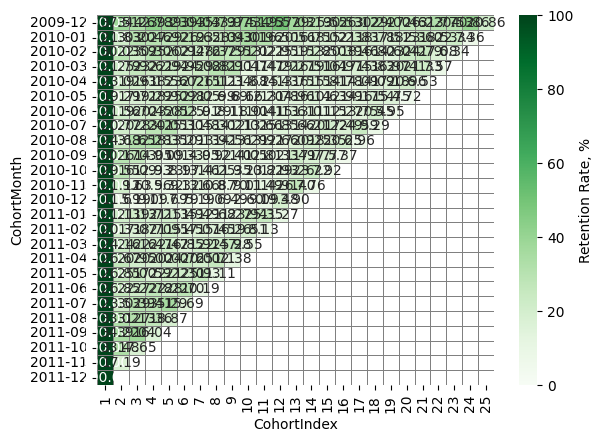

In [ ]:
#히트맵 코드
import seaborn as sns
heatmap = sns.heatmap(
    data=retention,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100           # Retention Rate의 범위 설정
)

In [ ]:
# 6. 첫 구매 분기(CohortQuarter) 추가
df['CohortQuarter'] = df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('Q')

# 7. 구매 발생 분기(PurchaseQuarter) 추가
df['PurchaseQuarter'] = df['InvoiceDate'].dt.to_period('Q')

# 8. CohortIndex 계산 (가입 이후 경과 분기 수)
def get_cohort_index(df):
    year_diff = df['PurchaseQuarter'].dt.year - df['CohortQuarter'].dt.year
    quarter_diff = df['PurchaseQuarter'].dt.quarter - df['CohortQuarter'].dt.quarter
    return year_diff * 4 + quarter_diff + 1  # 1부터 시작

df['CohortIndex'] = get_cohort_index(df)


In [ ]:
# 9. CohortQuarter, CohortIndex별 평균 구매수량 집계
cohort_quantity = df.groupby(['CohortQuarter', 'CohortIndex'])['Quantity'].mean().reset_index()

# 10. Pivot 테이블로 변환
average_quantity = cohort_quantity.pivot(index='CohortQuarter', columns='CohortIndex', values='Quantity')

# 11. 결과 미리 확인
print(average_quantity.round(1))


CohortIndex       1     2     3     4     5     6     7     8     9
CohortQuarter                                                      
2009Q4         12.3  21.1  13.4  15.5  13.5  15.4  15.0  16.0  14.5
2010Q1          9.7  12.0  11.7  10.9  10.6  11.0  13.0  10.2   NaN
2010Q2         10.4  11.5   9.8  15.4  14.9  15.8   9.6   NaN   NaN
2010Q3         13.9   8.0   9.9  11.9  14.1  10.3   NaN   NaN   NaN
2010Q4          7.6   8.3   8.3   9.5   8.7   NaN   NaN   NaN   NaN
2011Q1          9.8  13.5  12.6  11.6   NaN   NaN   NaN   NaN   NaN
2011Q2          8.8  11.3   9.2   NaN   NaN   NaN   NaN   NaN   NaN
2011Q3          9.2   6.2   NaN   NaN   NaN   NaN   NaN   NaN   NaN
2011Q4          9.1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN


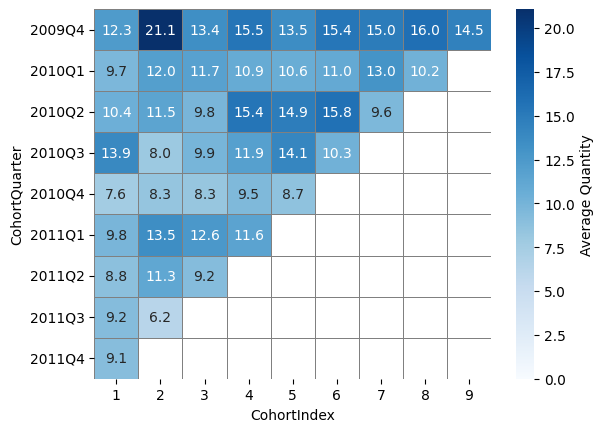

In [ ]:
#heatmap 코드
heatmap = sns.heatmap(
    data=average_quantity,
    annot=True,                # 셀 내부에 값 표시
    fmt='.1f',                 # 텍스트 형식 (소수점 1자리)
    cmap='Blues',              # 색상 팔레트
    cbar_kws={'label': 'Average Quantity'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0                     # 최소값 설정 (필요 시 조정 가능)
)

In [ ]:
# Year-Month 포맷으로 새로운 컬럼 추가
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


In [ ]:
# 월별 총 매출
monthly_revenue = df.groupby('YearMonth')['Total'].sum()

# 월별 고유 고객 수
monthly_active_users = df.groupby('YearMonth')['CustomerID'].nunique()


In [ ]:
# ARPU 계산
arpu = monthly_revenue / monthly_active_users

# 결과 확인
print(arpu.round(2))


YearMonth
2009-12    634.71
2010-01    676.78
2010-02    606.44
2010-03    572.45
2010-04    561.76
2010-05    527.24
2010-06    521.88
2010-07    569.62
2010-08    609.19
2010-09    649.78
2010-10    611.91
2010-11    674.32
2010-12    906.36
2011-01    606.74
2011-02    547.05
2011-03    568.59
2011-04    473.91
2011-05    600.79
2011-06    578.51
2011-07    578.29
2011-08    628.95
2011-09    715.39
2011-10    683.93
2011-11    661.84
2011-12    499.31
Freq: M, dtype: float64


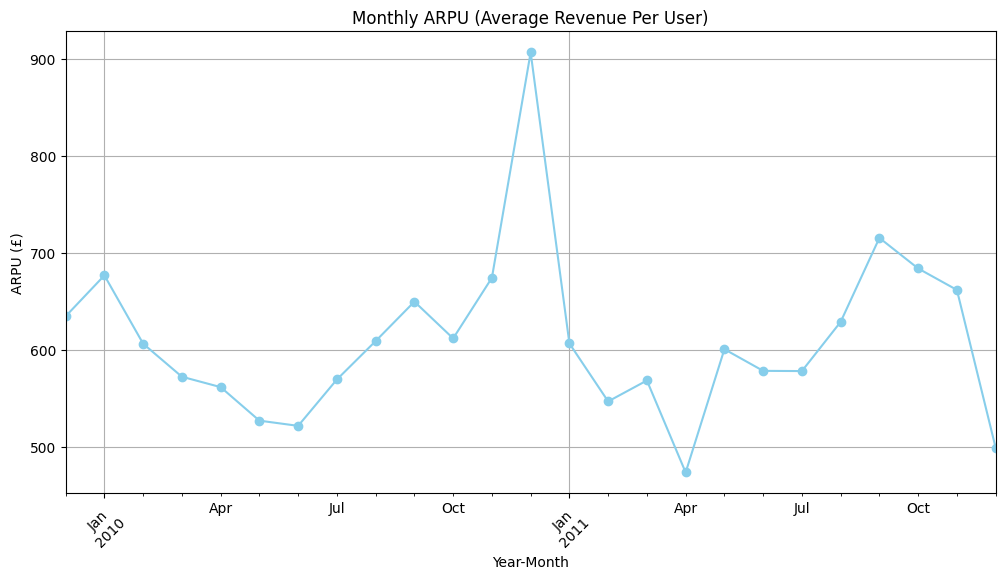

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
arpu.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# InvoiceDate를 datetime으로 변환
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# 고객별 총 구매 금액
customer_revenue = df.groupby('CustomerID')['Total'].sum()

# 고객별 총 구매 횟수 (InvoiceNo 기준, 고유한 구매 건수)
customer_orders = df.groupby('CustomerID')['Invoice'].nunique()

# 고객별 구매 기간 (최대 날짜 - 최소 날짜) + 1
customer_lifetime = (df.groupby('CustomerID')['InvoiceDate'].max() - df.groupby('CustomerID')['InvoiceDate'].min()).dt.days + 1


In [ ]:
# 평균 구매 금액 = 총 매출 / 총 구매 횟수
avg_order_value = customer_revenue / customer_orders

# 평균 구매 빈도 = 총 구매 횟수 / 고객 생애 기간 (일 단위로 생각)
purchase_frequency = customer_orders / customer_lifetime


In [ ]:
# CLV = 평균 구매 금액 × 평균 구매 빈도 × 고객 생애 기간
clv = avg_order_value * purchase_frequency * customer_lifetime


In [ ]:
# 고객별 지표를 하나의 데이터프레임으로 정리
clv_table = pd.DataFrame({
    'CLV': clv,
    'AvgOrderValue': avg_order_value,
    'PurchaseFrequency': purchase_frequency,
    'CustomerLifetime(Days)': customer_lifetime

})

# CLV 기준으로 내림차순 정렬
clv_table_sorted = clv_table.sort_values('CLV', ascending=False)

# 결과 미리보기
clv_table_sorted.round(2).head(10)


,CLV,AvgOrderValue,PurchaseFrequency,CustomerLifetime(Days)
CustomerID,,,,
18102,598215.22,3909.90,0.21,739
14646,523342.07,3191.11,0.22,736
14156,296564.69,1468.14,0.28,729
14911,270248.53,529.90,0.69,738
17450,233579.39,3829.17,0.14,430
13694,190825.52,1163.57,0.22,732
17511,171885.98,2022.19,0.12,735
12415,143269.29,4341.49,0.07,504
16684,141502.25,2176.96,0.09,729


In [ ]:
# 고객별 지표를 하나의 데이터프레임으로 정리
clv_table = pd.DataFrame({
    'AvgOrderValue': avg_order_value,
    'PurchaseFrequency': purchase_frequency,
    'CustomerLifetime(Days)': customer_lifetime,
    'CLV': clv
})

# CLV 기준으로 내림차순 정렬
clv_table_sorted = clv_table.sort_values('CLV', ascending=False)

# 결과 미리보기
clv_table_sorted.round(2).head(10)


,AvgOrderValue,PurchaseFrequency,CustomerLifetime(Days),CLV
CustomerID,,,,
18102,3909.90,0.21,739,598215.22
14646,3191.11,0.22,736,523342.07
14156,1468.14,0.28,729,296564.69
14911,529.90,0.69,738,270248.53
17450,3829.17,0.14,430,233579.39
13694,1163.57,0.22,732,190825.52
17511,2022.19,0.12,735,171885.98
12415,4341.49,0.07,504,143269.29
16684,2176.96,0.09,729,141502.25


In [ ]:
import numpy as np

# 1. 난수 생성 (Uniform Distribution)
waiting_times = np.random.uniform(5, 15, size=100)  # 5~15 사이에서 100개 생성

# 2. 평균 계산
mean_waiting_time = np.mean(waiting_times)

# 3. 표준편차 계산
std_waiting_time = np.std(waiting_times)

# 4. 결과 출력
print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")


평균 대기시간: 9.37
표준편차: 2.68


In [ ]:
import numpy as np

# 1. 성공 확률 설정
success_probability = 0.3

# 2. 시뮬레이션 (10회)
outcomes = np.random.binomial(1, success_probability, size=10)

# 3. 성공 횟수 계산
success_count = np.sum(outcomes)

# 4. 결과 출력
print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")


각 시도 결과: [0 0 1 1 0 1 1 0 0 0]
성공 횟수: 4


In [ ]:
import numpy as np

# 1. 기본 설정
num_students = 20
num_questions = 5
correct_probability = 0.7

# 2. 시뮬레이션
# 각 학생이 5문제를 푸는 걸 이항분포로 모델링
scores = np.random.binomial(num_questions, correct_probability, size=num_students)

# 3. 평균 점수 계산
average_score = np.mean(scores)

# 4. 결과 출력
print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")


학생별 점수: [3 3 5 3 3 5 3 4 3 1 0 4 4 4 3 5 3 5 4 3]
평균 점수: 3.40


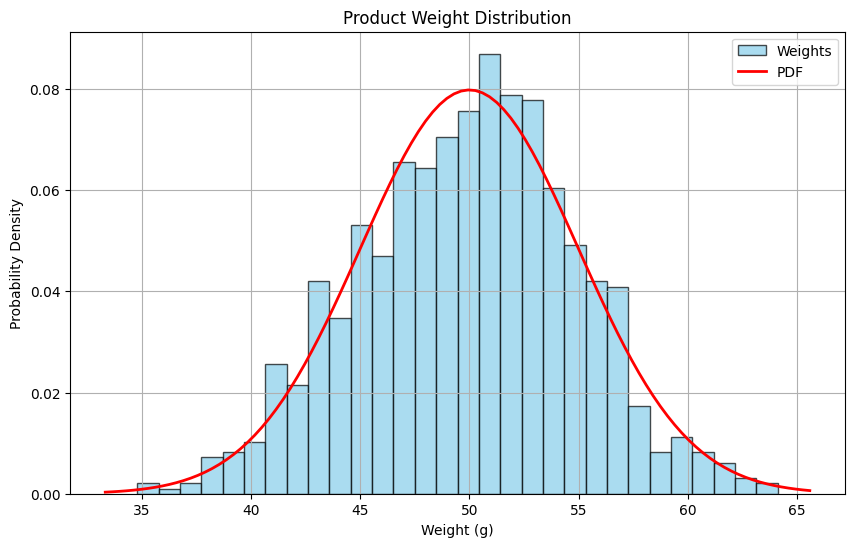

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. 시뮬레이션
mean = 50
std = 5
weights = np.random.normal(mean, std, size=1000)

# 2. 히스토그램
plt.figure(figsize=(10,6))
count, bins, ignored = plt.hist(weights, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Weights')

# 3. PDF(정규분포 선) 추가
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r', linewidth=2, label='PDF')

# 4. 레이아웃
plt.title('Product Weight Distribution')
plt.xlabel('Weight (g)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
